# Program to detect plates in image

0
*****************
Found plate: [ True]
*****************



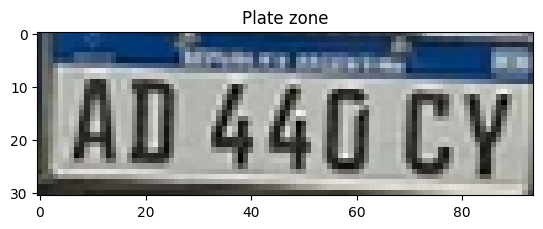

Number of characters in plate before filter: 9
Number of characters in plate after filter: 7


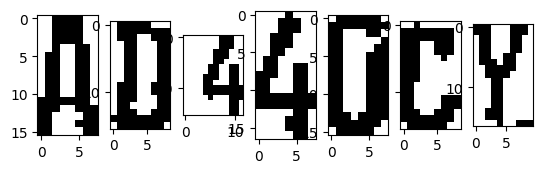

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


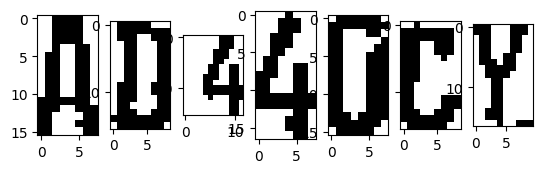

1
*****************
Found plate: [ True]
*****************



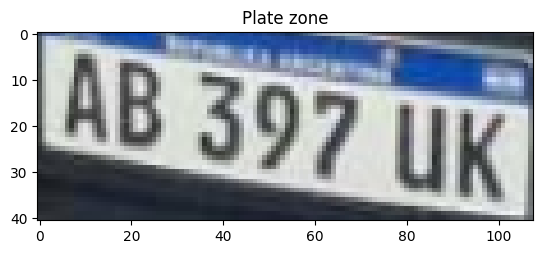

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


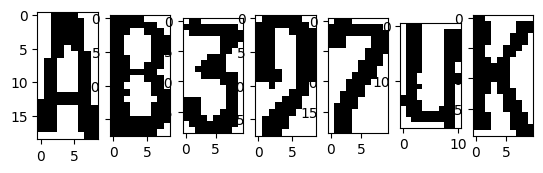

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


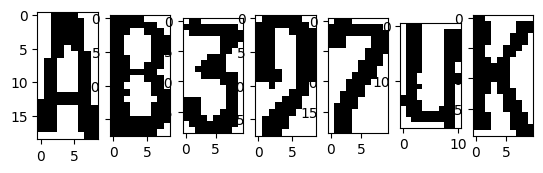

2
*****************
Found plate: [ True]
*****************



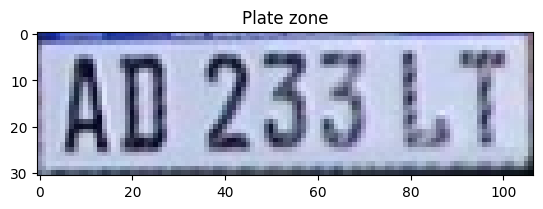

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


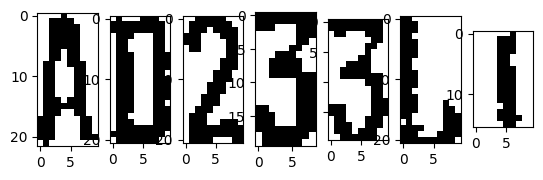

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


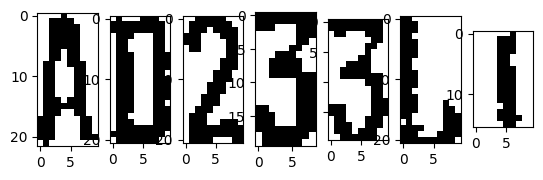

3
*****************
Found plate: [ True]
*****************



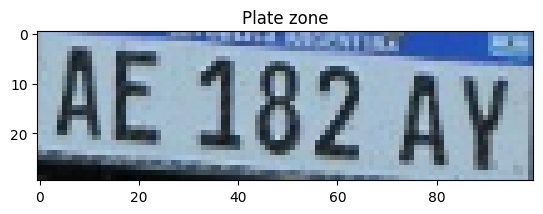

Number of characters in plate before filter: 8
Number of characters in plate after filter: 7


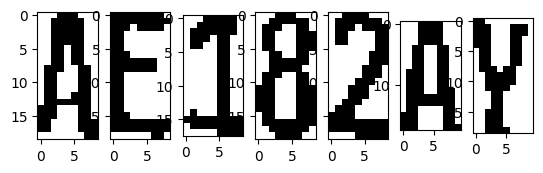

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


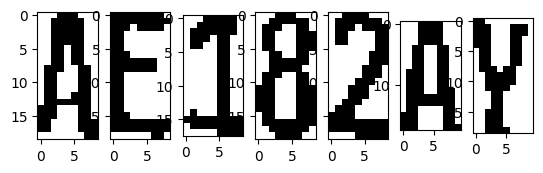

4
*****************
Found plate: [ True]
*****************



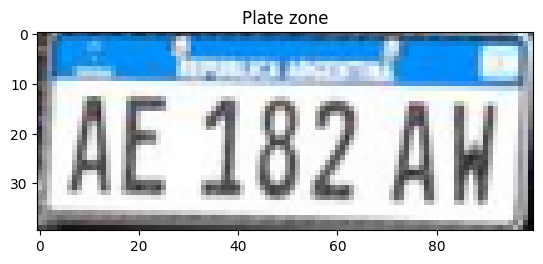

Number of characters in plate before filter: 10
Number of characters in plate after filter: 7


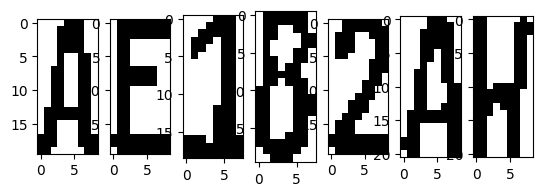

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


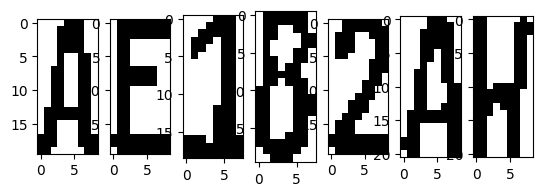

5
*****************
Found plate: [ True]
*****************



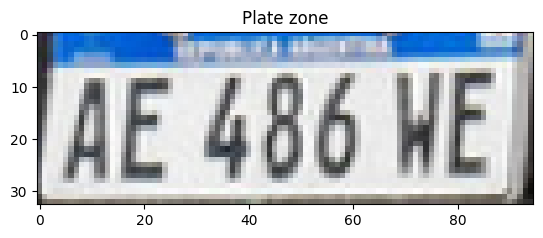

Number of characters in plate before filter: 8
Number of characters in plate after filter: 7


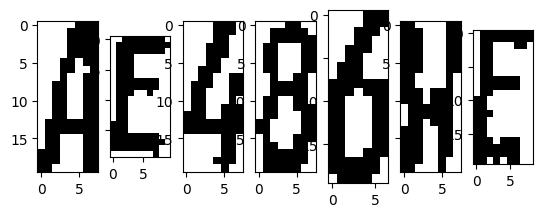

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


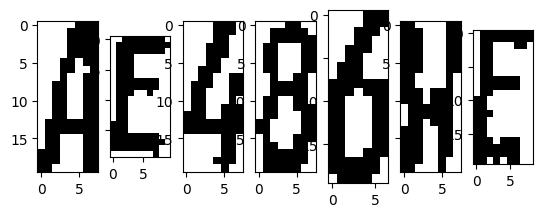

6
*****************
Found plate: [ True]
*****************



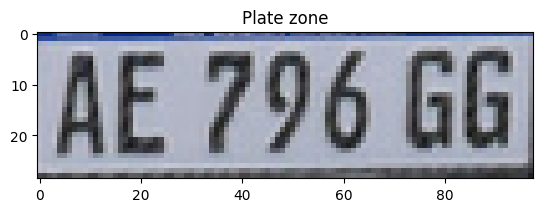

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


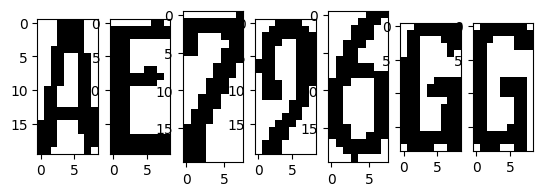

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


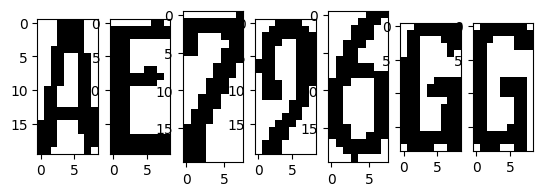

7
*****************
Found plate: [ True]
*****************



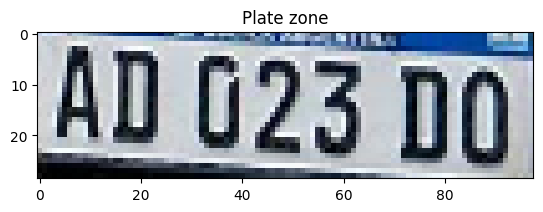

Number of characters in plate before filter: 9
Number of characters in plate after filter: 7


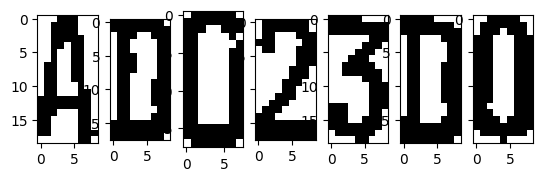

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


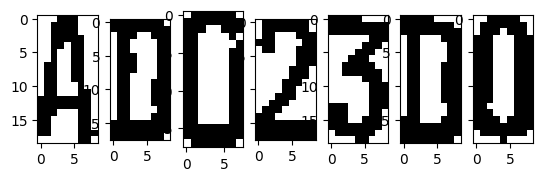

8
*****************
Found plate: [ True]
*****************



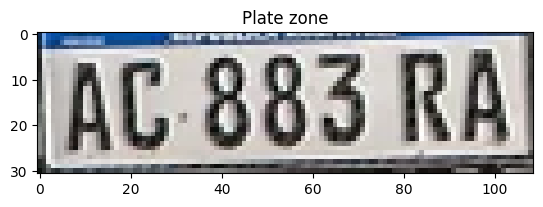

Number of characters in plate before filter: 8
Number of characters in plate after filter: 7


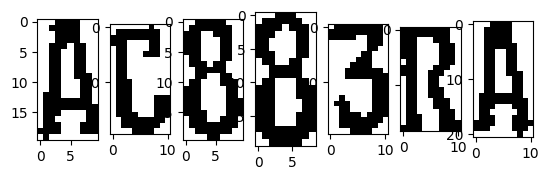

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


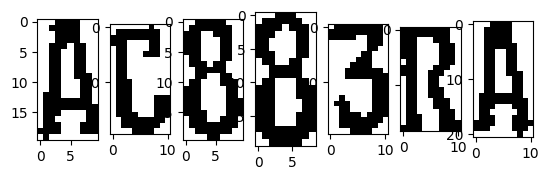

9
*****************
Found plate: [ True]
*****************



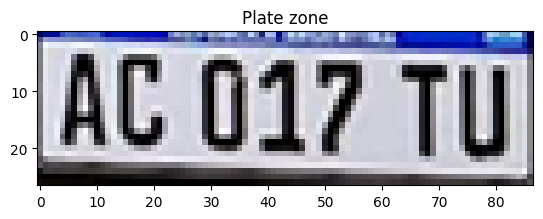

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


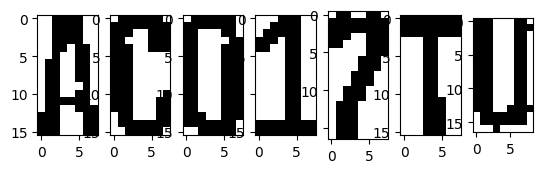

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


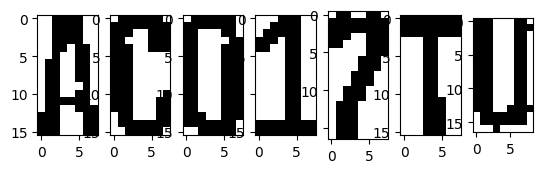

10
*****************
Found plate: [ True]
*****************



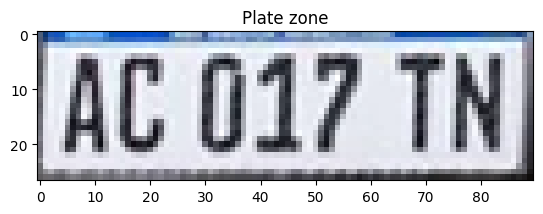

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


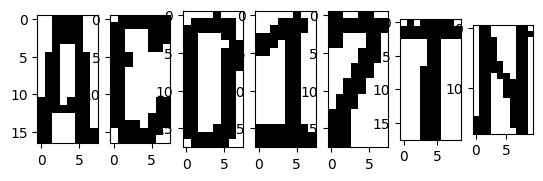

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


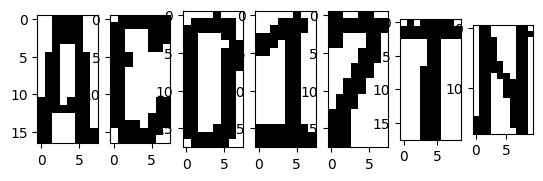

11
*****************
Found plate: [ True]
*****************



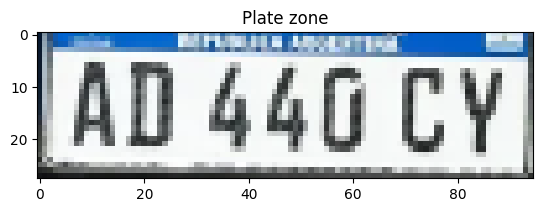

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


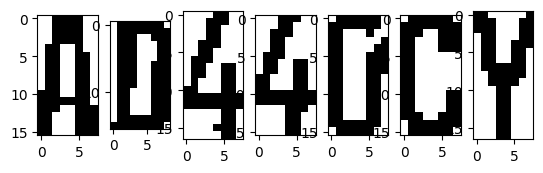

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


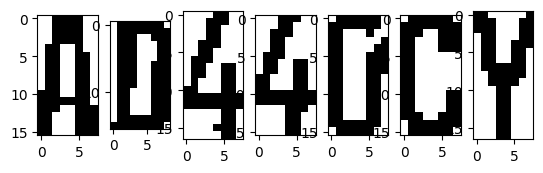

12
*****************
Found plate: [ True]
*****************



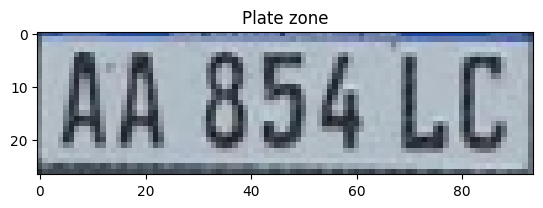

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


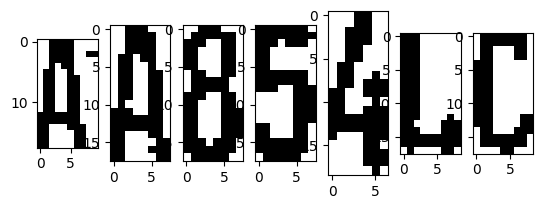

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


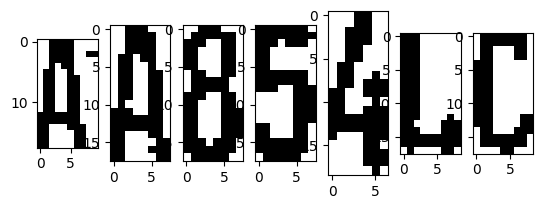

13
*****************
Found plate: [ True]
*****************



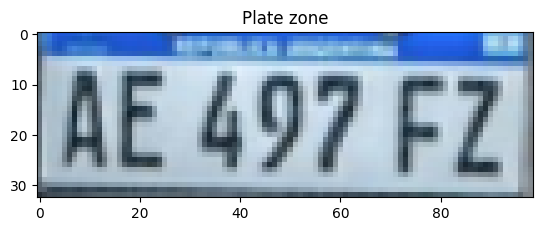

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


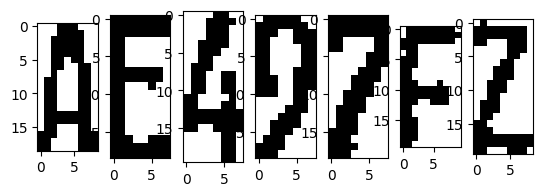

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


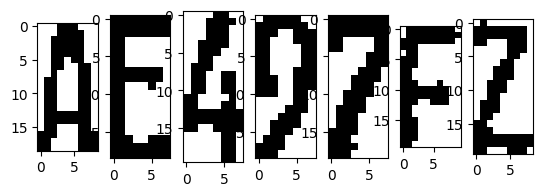

14
*****************
Found plate: [ True]
*****************



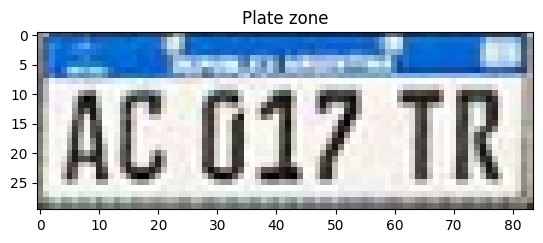

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


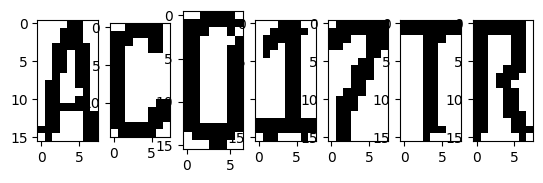

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


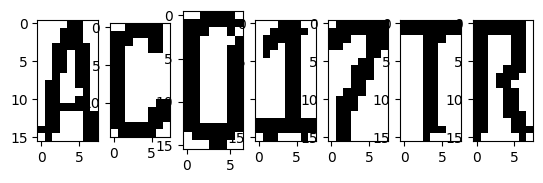

15
*****************
Found plate: [ True]
*****************



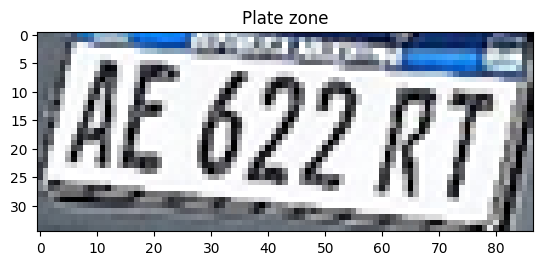

Number of characters in plate before filter: 4
Number of characters in plate after filter: 4


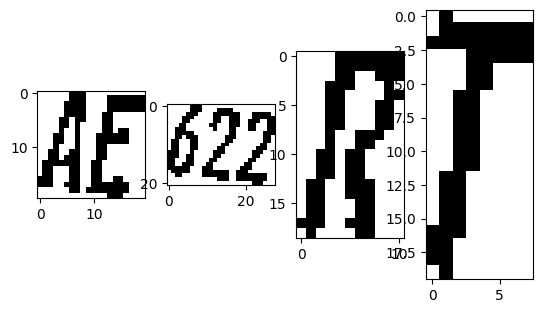

Recognizable characters: 4
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


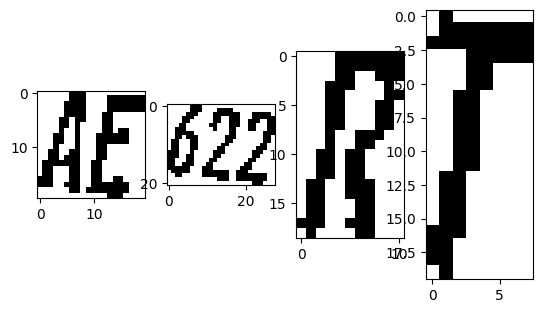

16
*****************
Found plate: [ True]
*****************



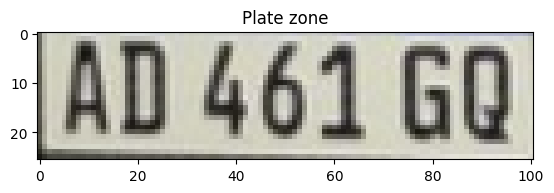

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


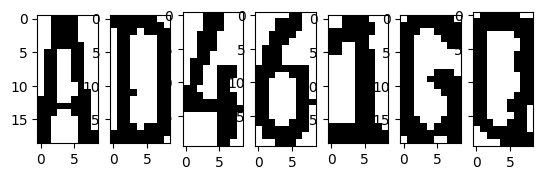

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


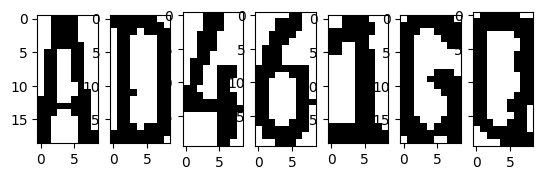

17
*****************
Found plate: [ True]
*****************



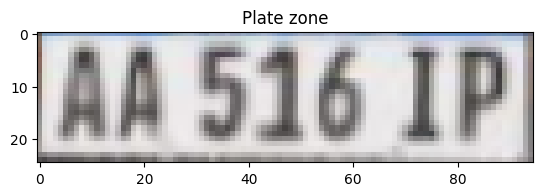

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


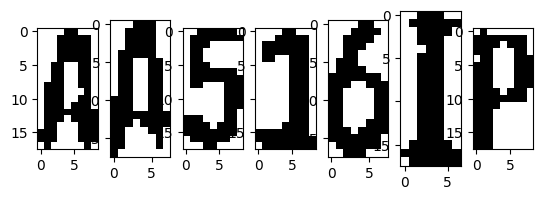

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


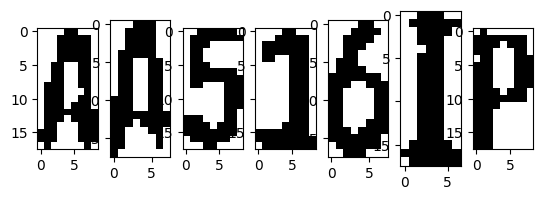

18
*****************
Found plate: [ True]
*****************



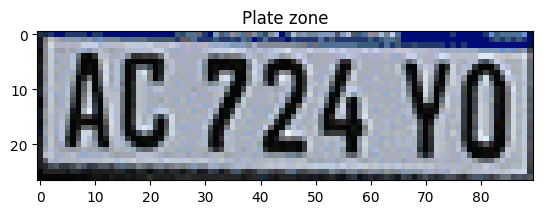

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


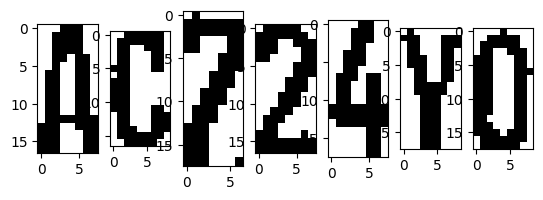

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


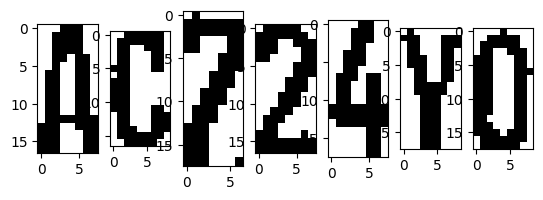

19
*****************
Found plate: [ True]
*****************



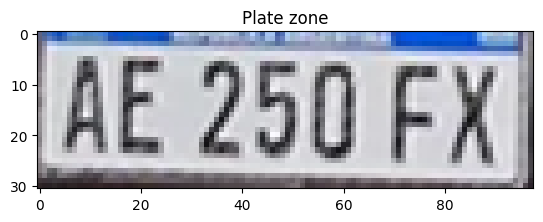

Number of characters in plate before filter: 8
Number of characters in plate after filter: 7


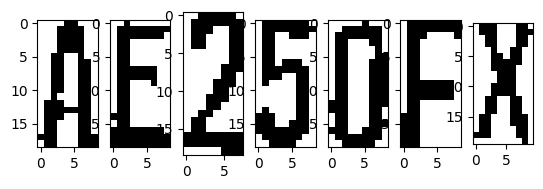

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


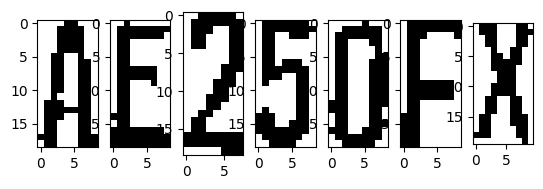

20
*****************
Found plate: [ True]
*****************



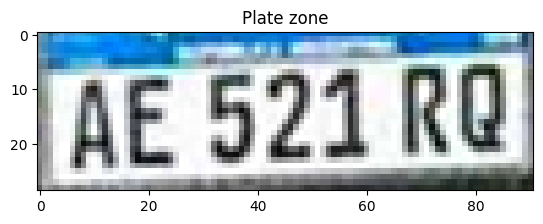

Number of characters in plate before filter: 5
Number of characters in plate after filter: 5


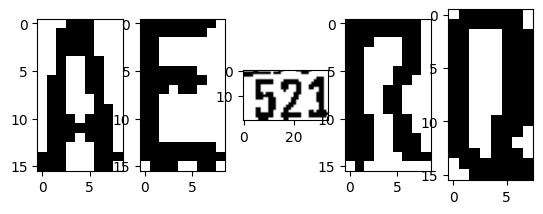

Recognizable characters: 5
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


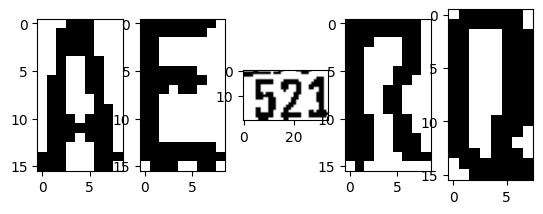

21
*****************
Found plate: [ True]
*****************



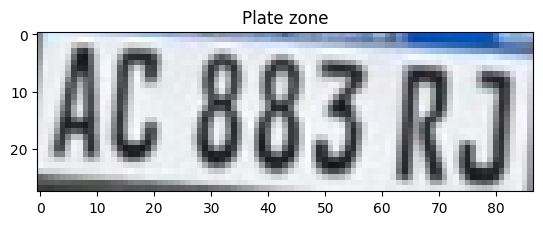

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


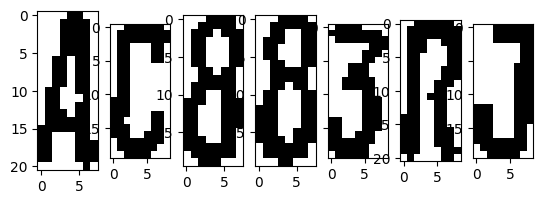

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


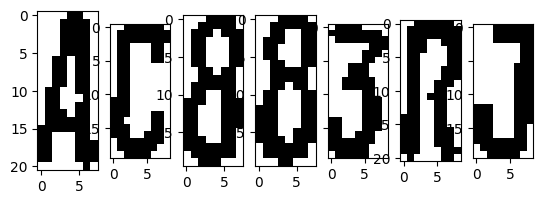

22
*****************
Found plate: [ True]
*****************



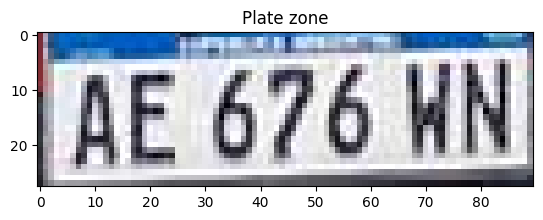

Number of characters in plate before filter: 6
Number of characters in plate after filter: 6


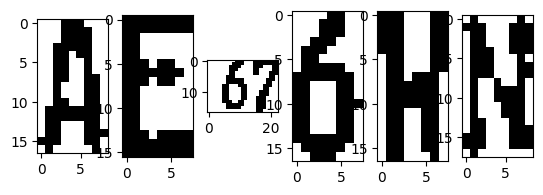

Recognizable characters: 6
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


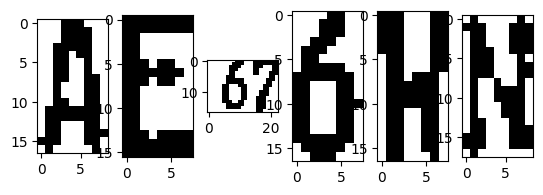

23
*****************
Found plate: [ True]
*****************



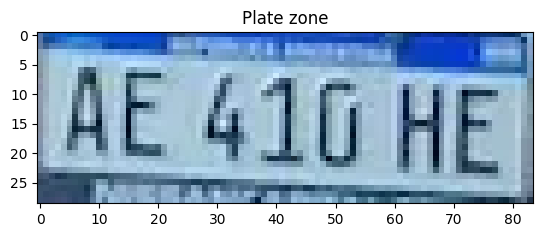

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


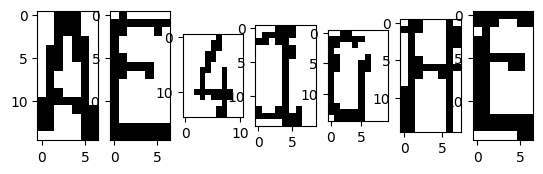

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


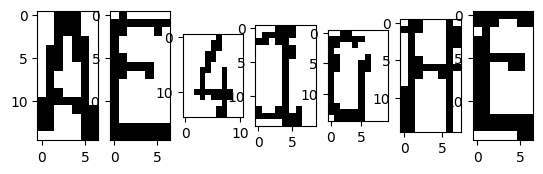

24
*****************
Found plate: [ True]
*****************



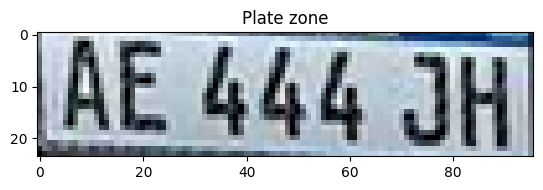

Number of characters in plate before filter: 8
Number of characters in plate after filter: 7


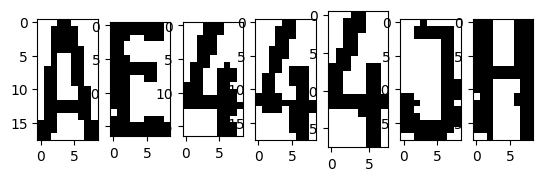

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


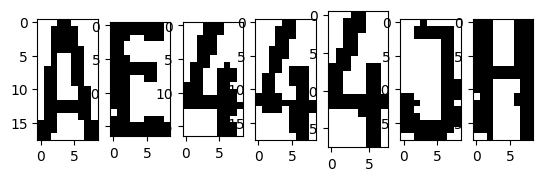

25
*****************
Found plate: [ True]
*****************



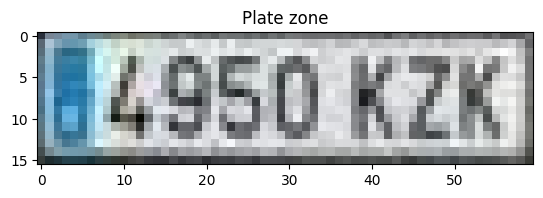

Number of characters in plate before filter: 8
Number of characters in plate after filter: 8


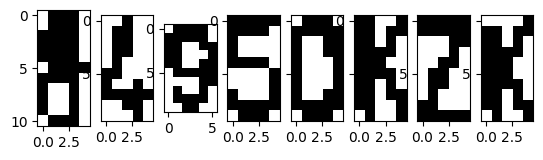

Recognizable characters: 8
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


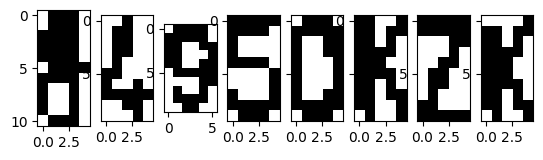

26
*****************
Found plate: [ True]
*****************



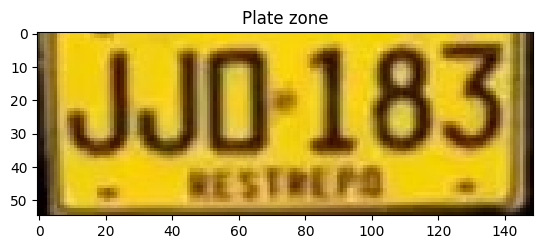

Number of characters in plate before filter: 6
Number of characters in plate after filter: 6


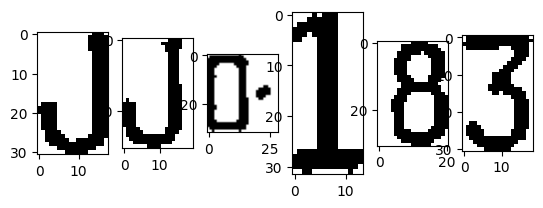

Recognizable characters: 6
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


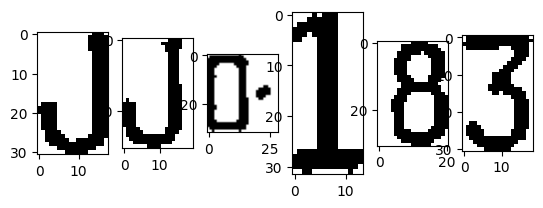

27
*****************
Found plate: [ True]
*****************



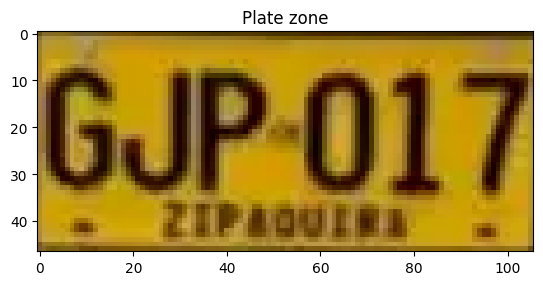

Number of characters in plate before filter: 6
Number of characters in plate after filter: 6


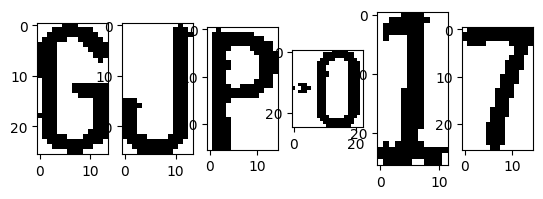

Recognizable characters: 6
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


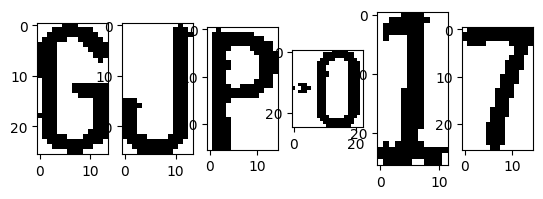

28
*****************
Found plate: [ True]
*****************



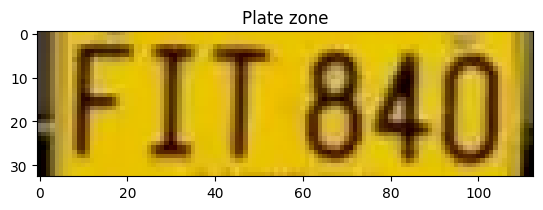

Number of characters in plate before filter: 6
Number of characters in plate after filter: 6


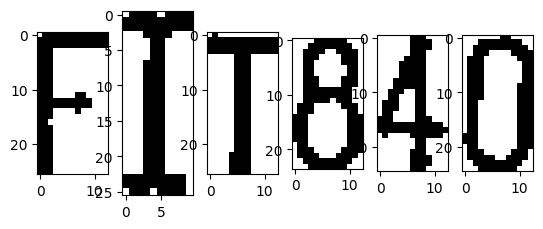

Recognizable characters: 6
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


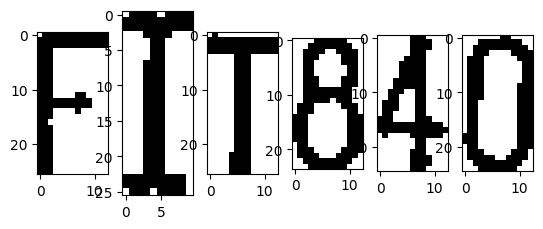

29
*****************
Found plate: [ True]
*****************



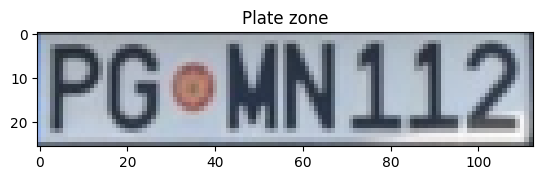

Number of characters in plate before filter: 8
Number of characters in plate after filter: 8


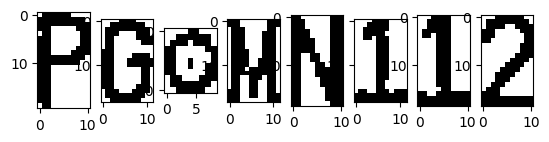

Recognizable characters: 8
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


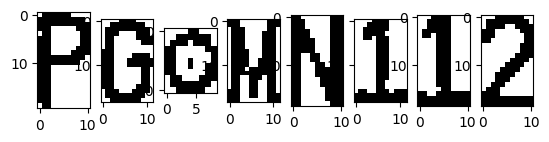

30
*****************
Found plate: [ True]
*****************



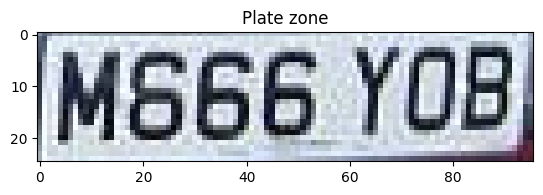

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


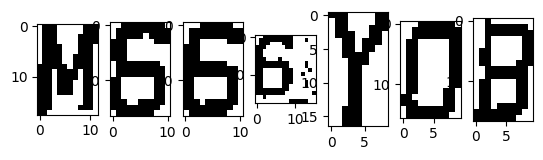

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


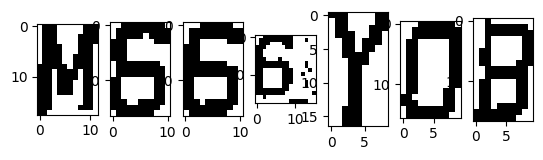

31
*****************
Found plate: [ True]
*****************



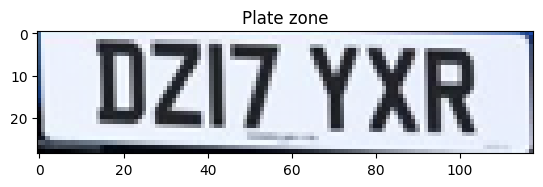

Number of characters in plate before filter: 9
Number of characters in plate after filter: 8
Not a character


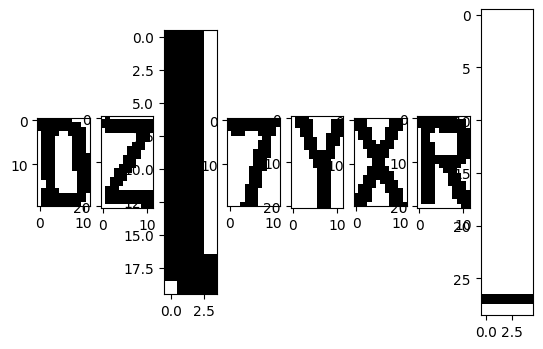

Recognizable characters: 8
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28]


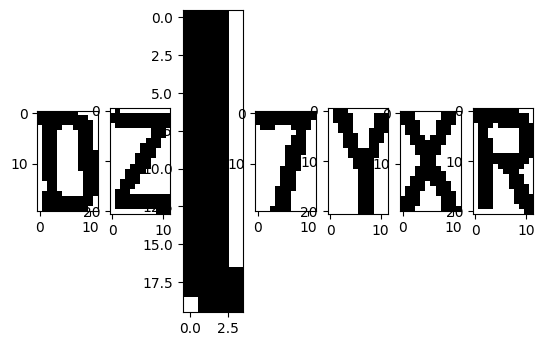

32
*****************
Found plate: [ True]
*****************



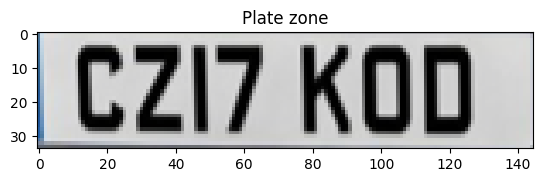

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


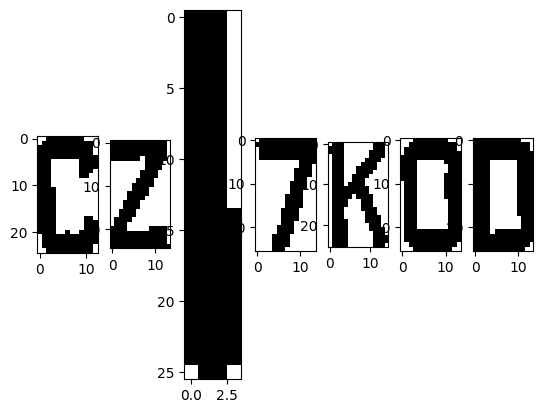

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


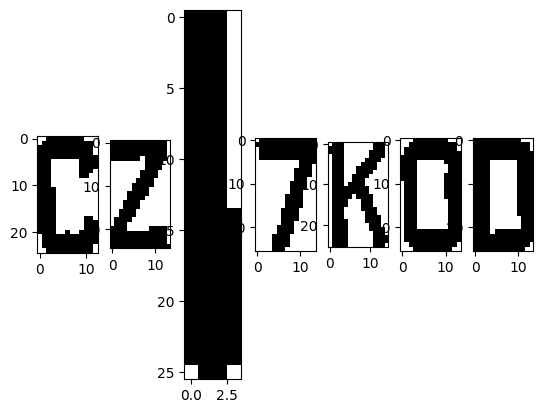

33
*****************
Found plate: [ True]
*****************



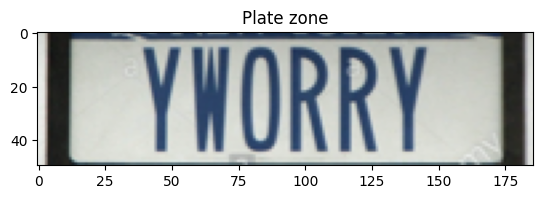

Number of characters in plate before filter: 6
Number of characters in plate after filter: 6


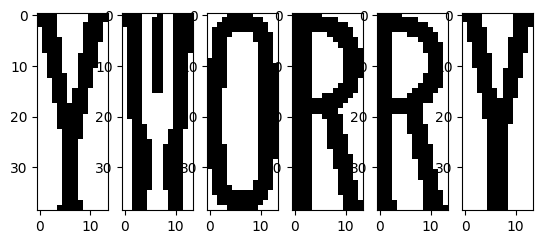

Recognizable characters: 6
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


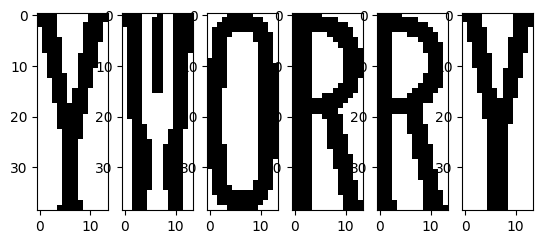

34
*****************
Found plate: [ True]
*****************



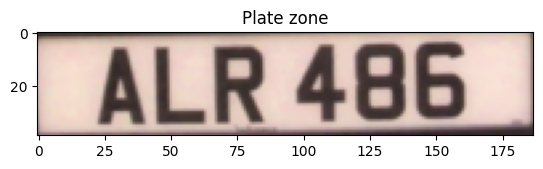

Number of characters in plate before filter: 6
Number of characters in plate after filter: 6


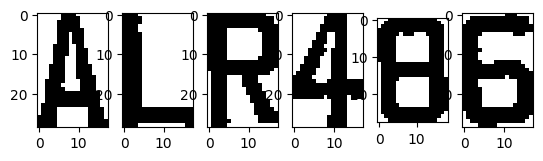

Recognizable characters: 6
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


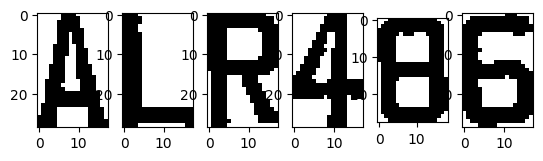

35
*****************
Found plate: [ True]
*****************



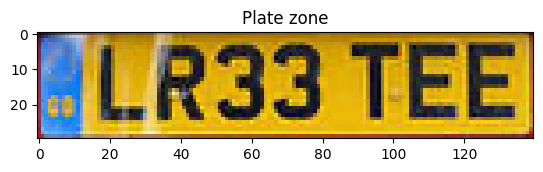

Number of characters in plate before filter: 8
Number of characters in plate after filter: 8


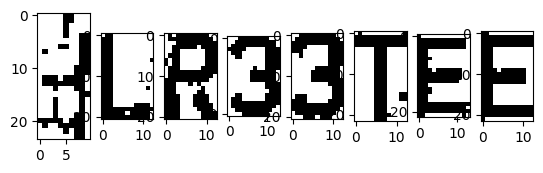

Recognizable characters: 8
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


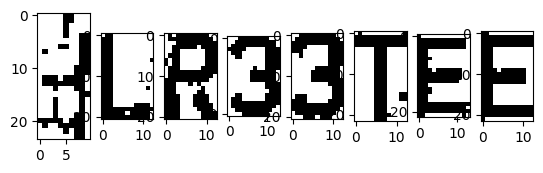

36
*****************
Found plate: [ True]
*****************



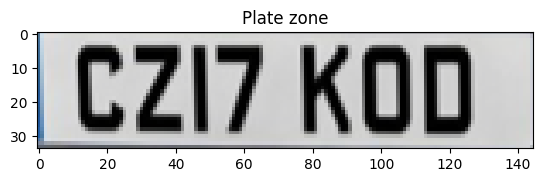

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


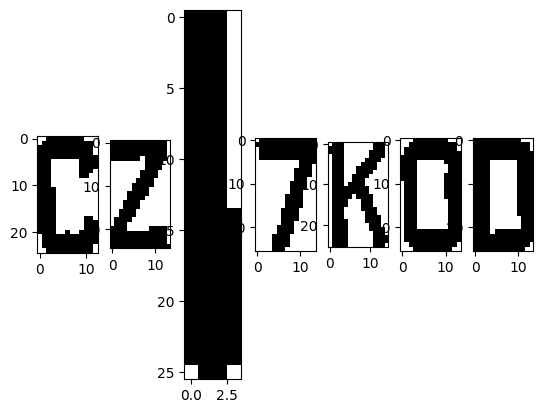

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


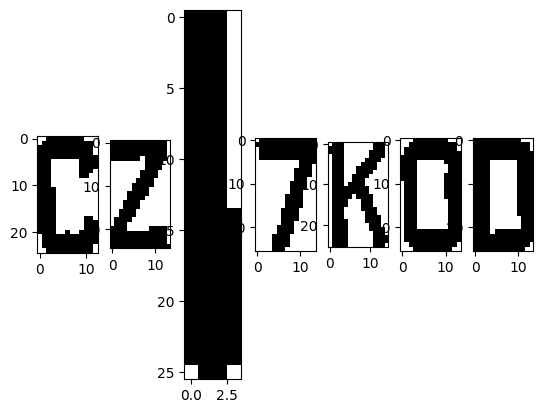

37
*****************
Found plate: [ True]
*****************



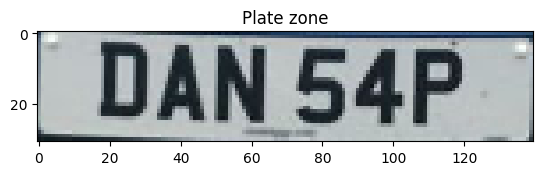

Number of characters in plate before filter: 9
Number of characters in plate after filter: 8
Not a character
Not a character


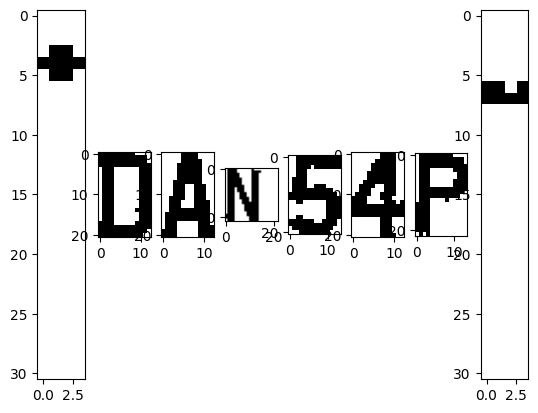

Recognizable characters: 8
rows to clean: [0, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: [0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


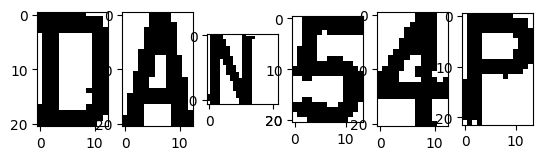

38
*****************
Found plate: [ True]
*****************



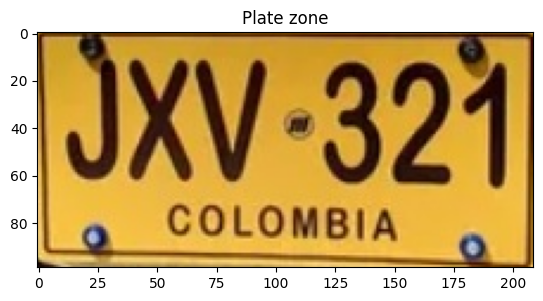

Number of characters in plate before filter: 6
Number of characters in plate after filter: 6


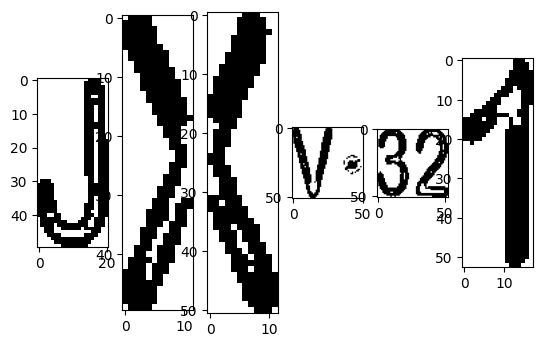

Recognizable characters: 6
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


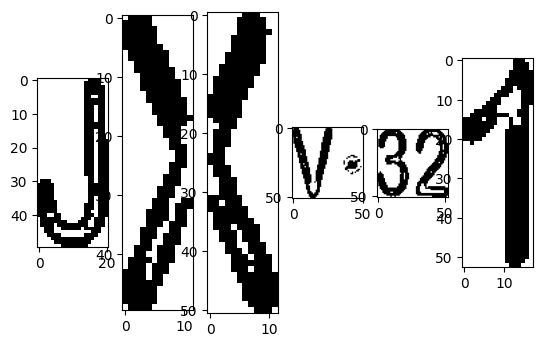

39
*****************
Found plate: [ True]
*****************



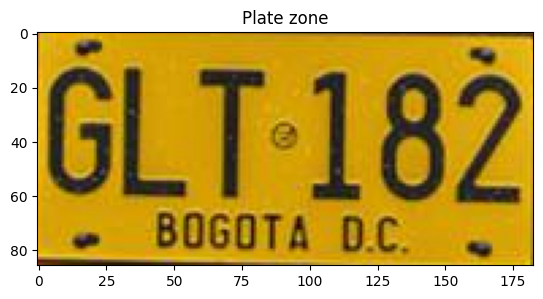

Number of characters in plate before filter: 6
Number of characters in plate after filter: 5


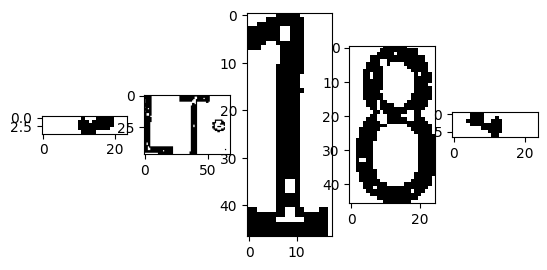

Recognizable characters: 5
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


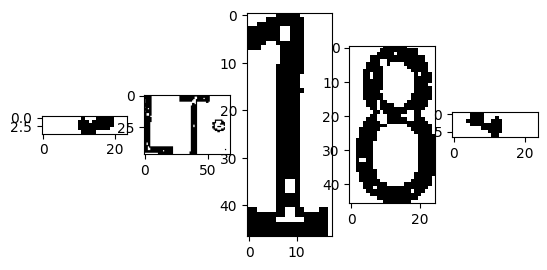

40
*****************
Found plate: [ True]
*****************



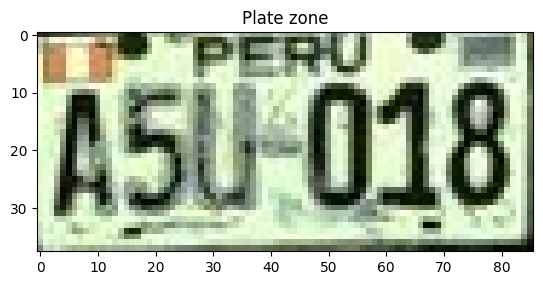

Number of characters in plate before filter: 3
Number of characters in plate after filter: 3


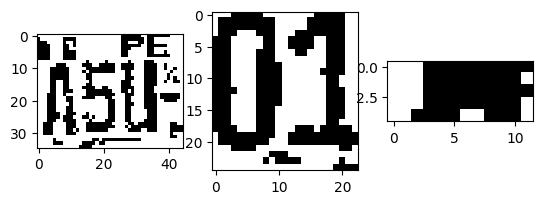

Recognizable characters: 3
rows to clean: []
rows to clean: []
rows to clean: []


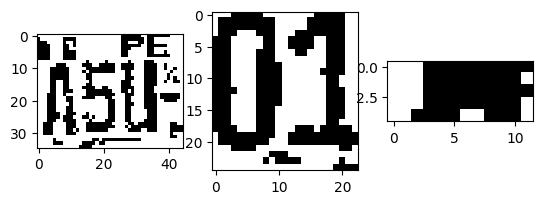

41
*****************
Found plate: [ True]
*****************



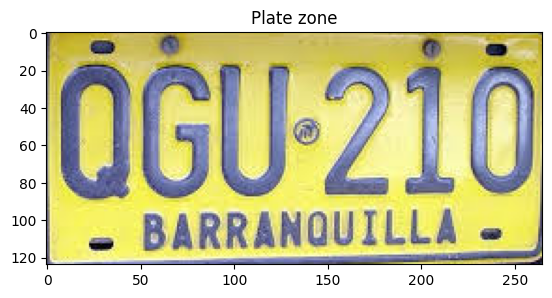

Number of characters in plate before filter: 7
Number of characters in plate after filter: 3


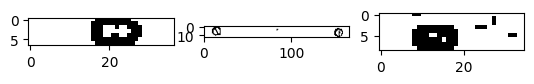

Recognizable characters: 3
rows to clean: []
rows to clean: []
rows to clean: []


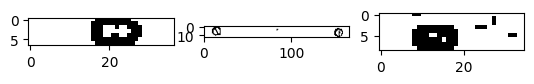

42
*****************
Found plate: [ True]
*****************



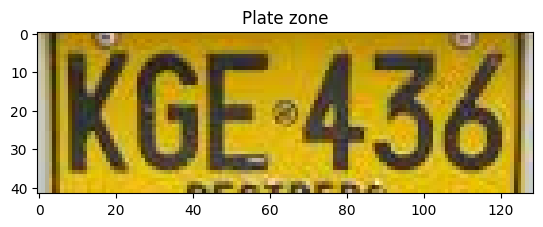

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


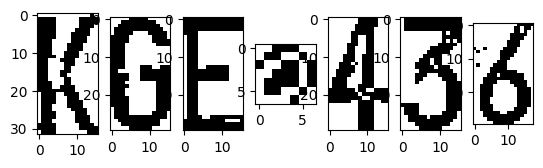

Recognizable characters: 7
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


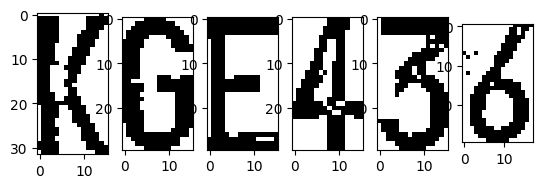

43
*****************
Found plate: [ True]
*****************



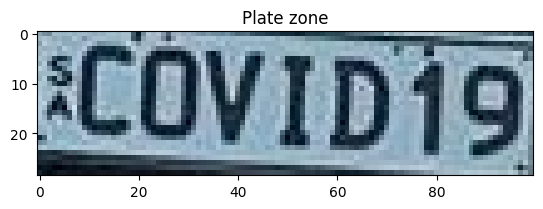

Number of characters in plate before filter: 10
Number of characters in plate after filter: 8


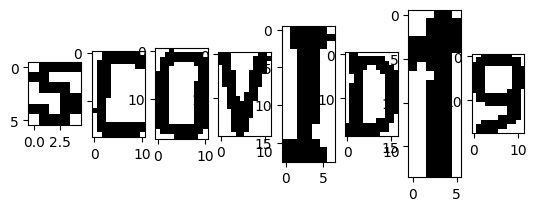

Recognizable characters: 8
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []
rows to clean: []


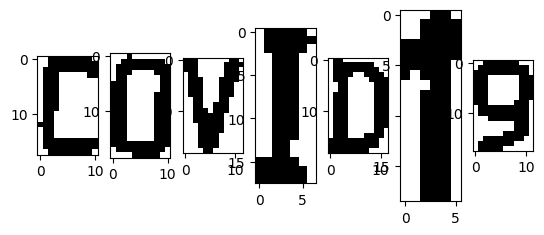

In [1]:
import cv2
import matplotlib.pyplot as plt
from plate_detector import detect_plate
import numpy as np
import skimage
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

index = "002"
for num in range(0, 44):
    print(num)
    img = cv2.imread(f'plates/{num:03}.png', cv2.IMREAD_COLOR)

    b, plate, m = detect_plate(img)
    print(f"*****************\nFound plate: {b}\n*****************\n")
    #print(m)
    
    plt.title("Plate zone")
    plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))
    plt.show()

    plate_gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

    thres = cv2.adaptiveThreshold(plate_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 7, 13)
    clear_border = skimage.segmentation.clear_border(thres)


    inverted = cv2.bitwise_not(clear_border)


    # Get totally white columns
    black = 0
    selected_columns = []
    for column in range(inverted.shape[1]):
        if black in inverted[:, column]: continue
        selected_columns.append(column)


    limit_columns = []
    # Get limit white columns
    for i in range(len(selected_columns)-1):
        if selected_columns[i+1] - selected_columns[i] == 1: continue
        limit_columns.append(selected_columns[i])
        limit_columns.append(selected_columns[i+1])

    #print(limit_columns)
    if len(limit_columns) % 2 == 0: 
        print(f"Number of characters in plate before filter: {len(limit_columns) // 2}")
    else:
        print("Not coherent number of characters found")

    plate_chars = []

    for i in range(0, len(limit_columns), 2):
        char = inverted[:, limit_columns[i]+1:limit_columns[i+1]]
        # Delete fake chars by width
        if char.shape[1] < 4: continue
        plate_chars.append(inverted[:, limit_columns[i]+1:limit_columns[i+1]])        

    print(f"Number of characters in plate after filter: {len(plate_chars)}")

    # Clean chars horizontally
    # Get totally white rows
    black = 0

    clean_plate_chars = []
    for plate_char in plate_chars:
        selected_rows = []
        for row in range(plate_char.shape[0]):
            if black in plate_char[row, :]: continue
            selected_rows.append(row)
        # plt.title(f"Char")
        # plt.imshow(cv2.cvtColor(plate_char, cv2.COLOR_BGR2RGB))
        # plt.show()
        #print(f"rows to clean: {selected_rows}")
        limit_rows = []
        # Get limit white rows
        for i in range(len(selected_rows)-1):
            if selected_rows[i+1] - selected_rows[i] == 1: continue
            limit_rows.append(selected_rows[i])
            limit_rows.append(selected_rows[i+1])
        #print(f"Limit rows: {limit_rows}")

        index_to_delete = []
        for i in range(0, len(limit_rows), 2):
            if limit_rows[i+1] - limit_rows[i] < 6:
                index_to_delete.append(i)
                index_to_delete.append(i+1)
        #print(index_to_delete)
        for i, index in enumerate(index_to_delete): limit_rows.pop(index - i)

        if len(limit_rows):
            plate_char = plate_char[limit_rows[0]+1: limit_rows[1], :]
            # plt.title(f"Char after row filter")
            # plt.imshow(cv2.cvtColor(plate_char, cv2.COLOR_BGR2RGB))
            # plt.show()
        else:
            print("Not a character")
        clean_plate_chars.append(plate_char)

    try:
        fig, ax = plt.subplots(1, len(clean_plate_chars))
        for i, pl in enumerate(clean_plate_chars):
            ax[i].imshow(cv2.cvtColor(pl, cv2.COLOR_BGR2RGB))
            # plt.title(f"Clean char 2 final final")
            # plt.imshow(cv2.cvtColor(pl, cv2.COLOR_BGR2RGB))
            # plt.show()
        plt.show()
    except:
        print("Problem with image")
    print(f"Recognizable characters: {len(clean_plate_chars)}")

    # final_chars = []
    # # Re check if it is a character or not
    # for plate in clean_plate_chars:
    #     if plate.shape[0] < 10 and plate.shape[1] < 10: continue
    #     final_chars.append(plate)


    # fig, ax = plt.subplots(1, len(final_chars))
    # for i, pl in enumerate(final_chars):
    #     ax[i].imshow(cv2.cvtColor(pl, cv2.COLOR_BGR2RGB))
    #     # plt.title(f"Clean char 2 final final")
    #     # plt.imshow(cv2.cvtColor(pl, cv2.COLOR_BGR2RGB))
    #     # plt.show()
    # plt.show()



    black = 0

    final_chars = []
    for plate_char in clean_plate_chars:
        selected_rows = []
        for row in range(plate_char.shape[0]):
            if black in plate_char[row, :]: continue
            selected_rows.append(row)
        # plt.title(f"Char")
        # plt.imshow(cv2.cvtColor(plate_char, cv2.COLOR_BGR2RGB))
        # plt.show()
        print(f"rows to clean: {selected_rows}")
        if len(selected_rows) / plate_char.shape[0] > 0.5: continue 
        final_chars.append(plate_char)

    final_chars2 = []
    # Re check if it is a character or not
    for plate in final_chars:
        if plate.shape[0] < 10 and plate.shape[1] < 10: continue
        final_chars2.append(plate)

    
    fig, ax = plt.subplots(1, len(final_chars2))
    for i, pl in enumerate(final_chars2):
        ax[i].imshow(cv2.cvtColor(pl, cv2.COLOR_BGR2RGB))
        # plt.title(f"Clean char 2 final final")
        # plt.imshow(cv2.cvtColor(pl, cv2.COLOR_BGR2RGB))
        # plt.show()
    plt.show()

